In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_hdf('./data/m12i_cluster_data.h5', key='star')
df.head()

,Unnamed: 0,feH,id_stars,radial_distance_stars,redshift_stars,snap_list_stars,star_mass,subhalo_mass_stars,subhalo_peak_mass,subhalo_stellar_mass_stars,...,vrstar,vthetastar,vxstar,vystar,vzstar,xstar,ystar,zstar,cluster_id,mgfe
73008,73008,-3.900070,4327099,9.211095,2.586207,138,4980.819555,7212108.0,22792022.0,57637.503906,...,-230.501434,181.553940,-112.675156,-343.308136,113.217339,-1.771496,4.111042,-8.050180,1,-0.007808
73089,73089,-2.714839,12736793,15.952224,2.586207,138,4835.979771,7212108.0,22792022.0,57637.503906,...,-256.820892,161.885895,-283.049805,-87.615784,-97.467377,13.269795,8.032511,-3.723538,1,0.443459
155921,155921,-2.079858,4764646,14.881052,1.100000,262,5222.007720,15022792.0,23190884.0,61523.742188,...,-248.070709,54.305466,24.864803,-178.009537,-190.022400,-5.710719,10.582099,8.766560,2,0.322527
155922,155922,-3.000179,9335794,12.130770,1.100000,262,5066.419914,15022792.0,23190884.0,61523.742188,...,-191.695251,-215.668335,-128.202011,-15.208354,279.746429,6.917473,-8.249007,-5.590888,2,0.067346
155924,155924,-3.719611,10771403,15.310860,1.100000,262,4728.352183,15022792.0,23190884.0,61523.742188,...,142.767578,157.148590,-49.536232,197.822800,-86.227676,-7.423605,11.882225,6.174565,2,-0.069087


In [3]:
df.tail()

,Unnamed: 0,feH,id_stars,radial_distance_stars,redshift_stars,snap_list_stars,star_mass,subhalo_mass_stars,subhalo_peak_mass,subhalo_stellar_mass_stars,...,vrstar,vthetastar,vxstar,vystar,vzstar,xstar,ystar,zstar,cluster_id,mgfe
136482,136482,-1.189347,13772951,10.771311,1.377359,227,5245.304615,4.282621e+10,6.451567e+10,942664576.0,...,-180.637390,70.557098,-127.893402,-36.960407,-141.319977,9.133440,3.344618,4.627629,179,0.296635
136484,136484,-2.303380,13839923,3.023079,1.377359,227,5115.768423,4.282621e+10,6.451567e+10,942664576.0,...,-97.654022,-176.574524,-394.861389,-289.413147,61.022011,-0.497667,2.137421,2.079126,179,0.426639
136485,136485,-1.865876,13857098,14.995711,1.377359,227,4801.821897,4.282621e+10,6.451567e+10,942664576.0,...,-185.101379,58.339264,-101.831299,-25.465464,-164.296402,11.403449,0.765757,9.708055,179,0.427046
136486,136486,-2.077071,13920866,10.554985,1.377359,227,4829.122123,4.282621e+10,6.451567e+10,942664576.0,...,-187.347992,-97.208725,59.406490,-277.727112,43.102951,-8.366145,5.772217,2.845495,179,0.312353
136487,136487,-1.648837,13959740,14.551060,1.377359,227,4811.558964,4.282621e+10,6.451567e+10,942664576.0,...,-52.771210,-68.148277,-20.822216,-15.045026,82.286217,11.469775,7.372729,-5.081386,179,0.362172


In [73]:
chosen_clusters = np.random.choice(179, 5)+1

In [74]:
df_small = df.loc[df['cluster_id'].isin(chosen_clusters)].copy()
df_small['cluster_name'] = df_small['cluster_id'].astype(str).copy()+'th cluster'

In [75]:
sns.set_palette('tab10')

<AxesSubplot:xlabel='feH', ylabel='mgfe'>

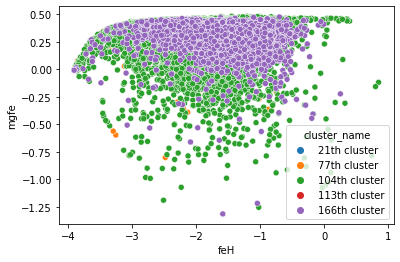

In [133]:
sns.scatterplot(data=df_small, x='feH', y='mgfe', hue='cluster_name')

<AxesSubplot:xlabel='feH', ylabel='mgfe'>

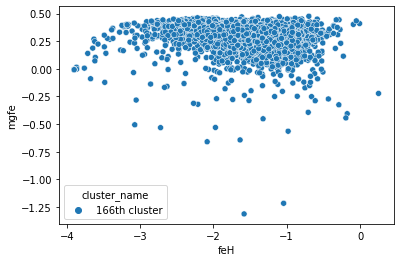

In [139]:
df_small_166 = df_small.loc[df_small['cluster_id']==166]
sns.scatterplot(data=df_small_166, x='feH', y='mgfe', hue='cluster_name')

<AxesSubplot:xlabel='feH', ylabel='Count'>

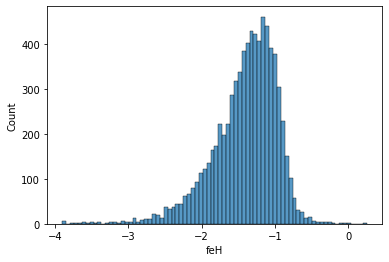

In [140]:
sns.histplot(df_small_166['feH'])

<AxesSubplot:xlabel='mgfe', ylabel='Count'>

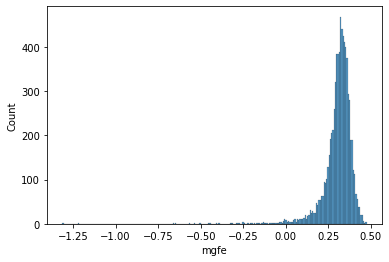

In [141]:
sns.histplot(df_small_166['mgfe'])

In [129]:
import hdbscan
clusterer = hdbscan.HDBSCAN(algorithm='best', alpha=1.0, approx_min_span_tree=True,
    gen_min_span_tree=False, leaf_size=40, metric='manhattan', min_cluster_size=20, min_samples=5, p=None)

In [130]:
from sklearn.datasets import make_blobs
blobs, labels = make_blobs(n_samples=2000, n_features=10)
len(pd.DataFrame(blobs))

2000

In [131]:
df_small_chem = df_small[['feH', 'mgfe']]
clusterer.fit(df_small_chem)

HDBSCAN(metric='manhattan', min_cluster_size=20, min_samples=5)

<AxesSubplot:xlabel='feH', ylabel='mgfe'>

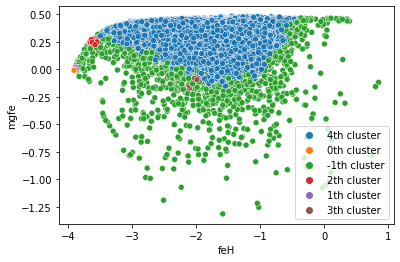

In [132]:
labels = [f'{label}th cluster' for label in clusterer.labels_]
sns.scatterplot(data=df_small, x='feH', y='mgfe', hue=labels)